## *Imports*

In [235]:
import pandas as pd
import numpy as np
import sklearn.linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## *Constants*

In [236]:
pathToData = "Data/"

femaleMarker = 0
maleMarker = 1

validationSplit = 0.9

colorsArr = [ 'blue', 'red' ]

In [237]:
heightToWeightDF = pd.read_csv(pathToData + "Training set.csv")

"""
For learning: Pandas DataFrame operations

* **`dataFrame.isnull()`**:
   - **Purpose:**  Detects missing values (NaN) in a DataFrame.
   - **Output:** Returns a new DataFrame of the *same shape* as the original.
   - **Content:**  Each cell in the new DataFrame contains:
        - `True` if the corresponding cell in the original DataFrame contains a missing value (NaN - Not a Number).
        - `False` if the corresponding cell in the original DataFrame contains a valid (non-missing) value.
   - **Example:** If `dataFrame` has some missing data, `dataFrame.isnull()` creates a DataFrame of booleans indicating the location of missing data.

* **`dataFrame.any(axis)`**:
   - **Purpose:** Checks if *any* value is `True` along a given axis. Typically used after `isnull()` to find rows/columns with missing data.
   - **Input:** The `axis` parameter determines the direction of the operation:
       - `axis=0` or `axis='index'`: Operates along the rows (checks if any value in each *column* is True). Returns a pandas Series with index based on column names.
       - `axis=1` or `axis='columns'`: Operates along the columns (checks if any value in each *row* is True). Returns a pandas Series with index based on row numbers.
   - **Output:** Returns a pandas Series containing:
       - `True` if *at least one* value in the specified row/column is `True`.
       - `False` if *all* values in the specified row/column are `False`.
   - **Example:** `dataFrame.isnull().any(axis=1)` identifies rows containing at least one missing value.

* **`dataFrame[series]`**:
   - **Purpose:** Selects rows from a DataFrame based on a Boolean Series. This is called boolean indexing or masking.
   - **Input:** The `series` must be a Boolean Series (i.e., contains only `True` and `False` values), and its index must match the row index of the DataFrame.
   - **Output:** Returns a new DataFrame containing:
        - Only the rows where the corresponding value in `series` is `True`.
        - Rows where the corresponding value in `series` is `False` are *excluded*.
   - **Example:** `dataFrame[dataFrame.isnull().any(axis=1)]` returns a new DataFrame consisting of rows that have at least one NaN value.
   - **Note:** This is an extremely useful way to filter DataFrame rows based on a condition.

*  **`dataFrame.index`**:
    - **Purpose**: Accesses the row labels (indices) of the DataFrame.
    - **Output**: Returns a sequence (often a `pandas.Index` object) representing the row labels of the DataFrame. These labels can be numbers, strings, dates, etc.
    - **Use Cases**: Useful for various operations, such as iterating through rows by their labels, selecting rows by their index, or for reshaping a DataFrame, and debugging purposes.
    - **Example**:
      ```python
      import pandas as pd
      data = {'col1': [1, 2], 'col2': [3, 4]}
      df = pd.DataFrame(data)
      print(df.index)  # Output: RangeIndex(start=0, stop=2, step=1)
      ```

* **`dataFrame.drop(labels, axis)`**:
   - **Purpose:** Creates a *new* DataFrame with specified rows or columns removed. It does *not* modify the original DataFrame.
   - **Inputs:**
        - `labels`: The index (or a list of indexes) of the rows/columns to remove.
        - `axis`:  Specifies if rows (`axis=0` or `'index'`) or columns (`axis=1` or `'columns'`) should be removed.
   - **Output:** Returns a *new* DataFrame without the removed rows or columns.
   - **Examples:**
     - `dataFrame.drop(labels=[0, 2], axis=0)` removes rows at index 0 and 2
     - `dataFrame.drop(labels=['column1', 'column2'], axis=1)` removes the columns named `column1`, `column2`
   - **Important:** You must assign the output of `drop()` to a new DataFrame if you want to save the modified version (e.g. `new_df = dataFrame.drop(...)`).
"""

heightToWeightDF = heightToWeightDF.drop(axis = 1, index = heightToWeightDF[heightToWeightDF.isnull().any(axis = 1)].index)
heightToWeightDF = heightToWeightDF.drop(axis = 1, index = heightToWeightDF[heightToWeightDF["Height"] >= 230].index)
heightToWeightDF = heightToWeightDF.drop(axis = 1, index = heightToWeightDF[heightToWeightDF["Weight"] >= 160].index)
heightToWeightDF = heightToWeightDF.drop(axis = 1, index = heightToWeightDF[heightToWeightDF["Height"] <= 0].index)
heightToWeightDF = heightToWeightDF.drop(axis = 1, index = heightToWeightDF[heightToWeightDF["Weight"] <= 0].index)

anomaliesSeries = ((heightToWeightDF["Weight"] / (heightToWeightDF["Height"] * heightToWeightDF["Height"])) * 10000).between(16.5, 40.5)
anomaliesSeries = anomaliesSeries[~anomaliesSeries]

heightToWeightDF = heightToWeightDF.drop(axis = 1, index = anomaliesSeries.index)

print(heightToWeightDF)

      Height  Weight     Sex
1     148.53   74.45  Female
2     167.04   81.22    Male
3     161.54   71.47    Male
4     174.31   78.18    Male
5     143.05   79.27  Female
...      ...     ...     ...
2995  150.83   49.66  Female
2996  157.09   64.34  Female
2997  162.99   45.58  Female
2998  154.76   48.92  Female
2999  185.08   82.74    Male

[2766 rows x 3 columns]


In [238]:
curWeights = list(heightToWeightDF['Weight'])
curHeights = list(heightToWeightDF['Height'])

curGenders = [maleMarker if heightToWeightDF['Sex'][i] == 'Male' else femaleMarker for i in heightToWeightDF.index]

maleSize = curGenders.count(maleMarker)
femaleSize = len(curGenders) - maleSize

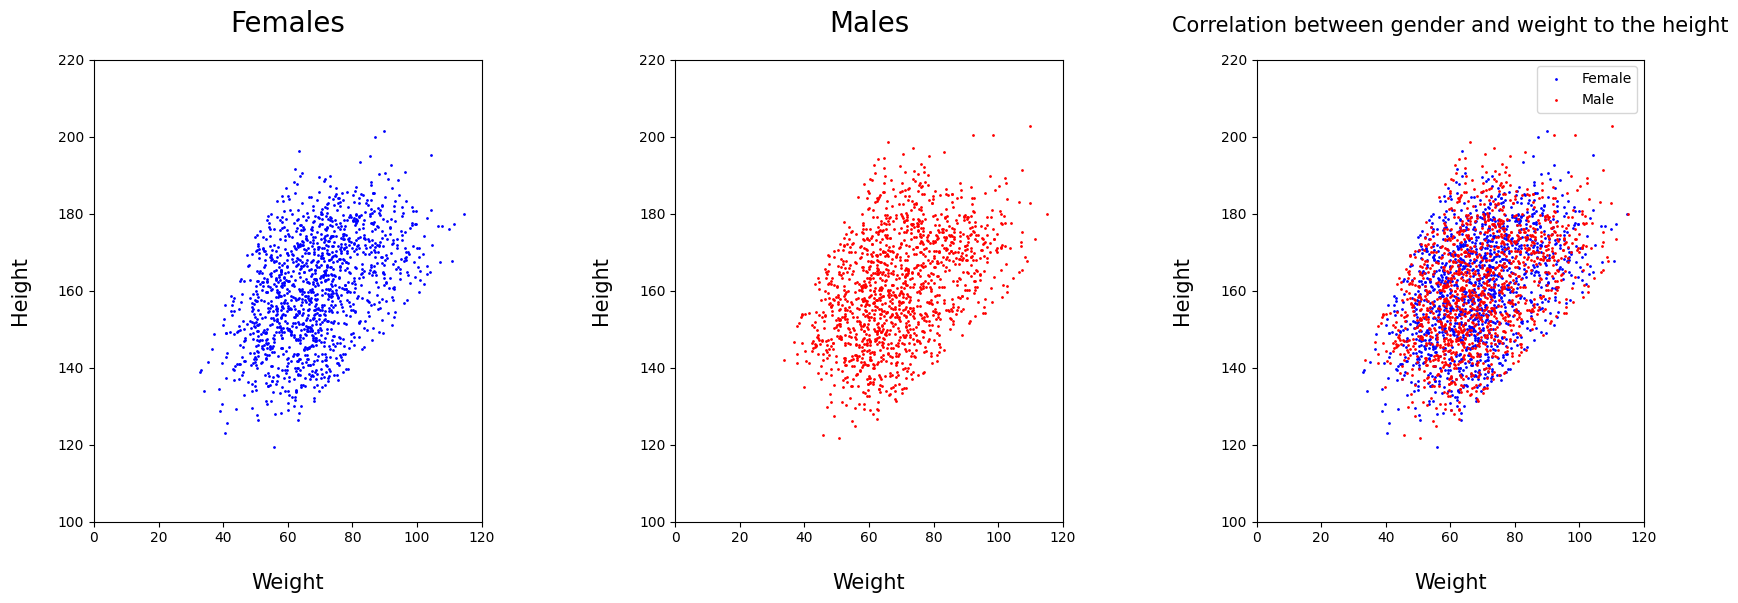

In [239]:
fig, axes = plt.subplots(1, 3, figsize = (20, 6))

for ax in axes:
    ax.set_xlim(0, 120)
    ax.set_ylim(100, 220)
    
    ax.set_xlabel("Weight", fontsize = 15, labelpad = 20)
    ax.set_ylabel("Height", fontsize = 15, labelpad = 20)

axes[0].set_title('Females', pad = 20, fontsize = 20)
axes[0].scatter(curWeights[maleSize : maleSize + femaleSize], curHeights[maleSize : maleSize + femaleSize], c = colorsArr[femaleMarker], s = 1)

axes[1].set_title('Males', pad = 20, fontsize = 20)
axes[1].scatter(curWeights[0 : maleSize], curHeights[0 : maleSize], c = colorsArr[maleMarker], s = 1)

axes[2].set_title('Correlation between gender and weight to the height', pad = 20, fontsize = 15)
axes[2].scatter(curWeights[maleSize : maleSize + femaleSize], curHeights[maleSize : maleSize + femaleSize], c = colorsArr[femaleMarker], s = 1, label = 'Female')
axes[2].scatter(curWeights[0 : maleSize], curHeights[0 : maleSize], c = colorsArr[maleMarker], s = 1, label = 'Male')

plt.subplots_adjust(wspace = 0.5)
plt.legend()

plt.show()

## *Why linear regression?*
#### As we can see from the first two plots the correlation between weight and height for males is basically a thick straight line and the correlation between weight and height for females is the same. When we connect this two plots we can see that together they still make a line. It's just that for males it's higher on Z-Axis. So we have a line and the same line but higher on Z-Axis. It's two parallel lines that make a plane. 
#### So we have a function for the plane: $ f(x, y) = ax + by + C $
#### Thus, we can solve this task using linear regression

In [240]:
stdScaler = StandardScaler()

In [241]:
trainIndexLimit = round(len(curWeights) * validationSplit)
validationAmount = 40

trainData = [ list(curPair) for curPair in zip(curGenders[0 : (trainIndexLimit + 1)], curWeights[0 : (trainIndexLimit + 1)]) ]
validationData = [ list(curPair) for curPair in zip(curGenders[trainIndexLimit + 1 : trainIndexLimit + 1 + validationAmount], curWeights[trainIndexLimit + 1 : trainIndexLimit + 1 + validationAmount])]

trainData = stdScaler.fit_transform(trainData)
validationData = stdScaler.fit_transform(validationData)

trainAns = curHeights[0 : (trainIndexLimit + 1)]
validationAns = curHeights[trainIndexLimit + 1 : trainIndexLimit + 1 + validationAmount]

In [242]:
curModel = sklearn.linear_model.LinearRegression() 
curModel.fit(trainData, trainAns)

LinearRegression()

In [243]:
validationPrediction = curModel.predict(validationData)

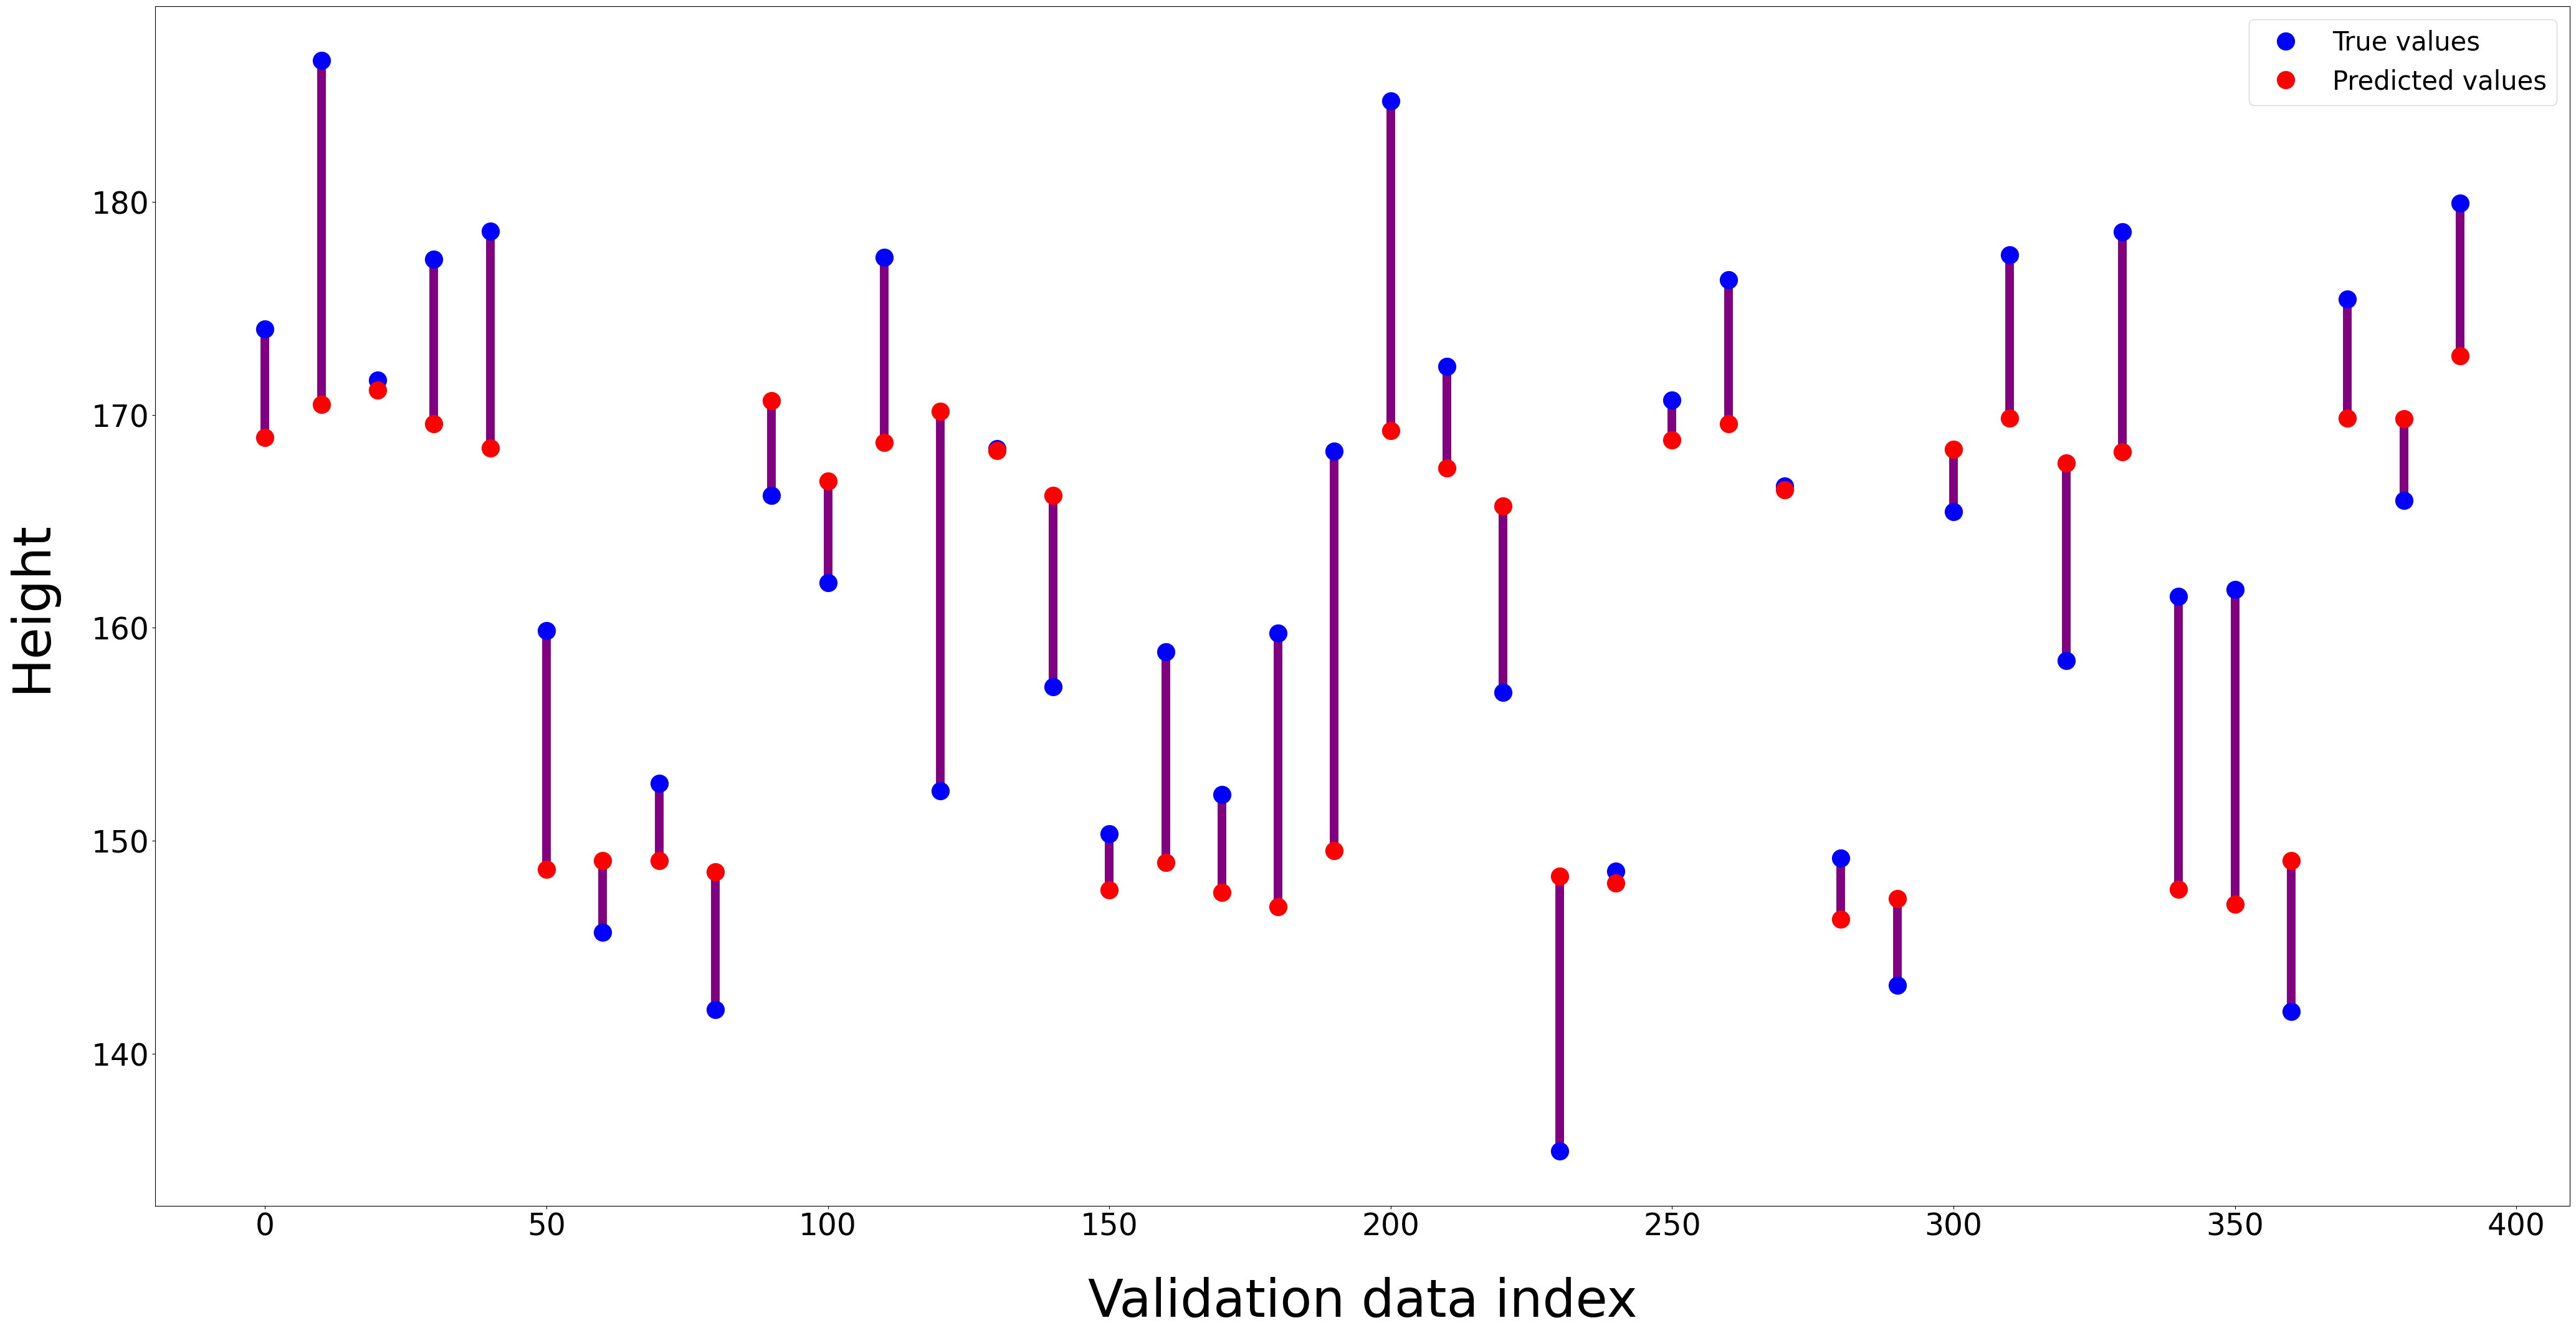

In [244]:
arrX = [10 * i for i in range(len(validationAns))]

plt.figure(figsize = (50, 25))

plt.vlines(arrX, ymin = [min(validationPrediction[i], validationAns[i]) for i in range(len(validationAns))], ymax = [max(validationPrediction[i], validationAns[i]) for i in range(len(validationAns))], linewidth = 10, colors = 'purple')
plt.plot(arrX, validationAns, marker = 'o', linestyle = 'None', markersize = 20, color = 'blue', label = 'True values')
plt.plot(arrX, validationPrediction, marker = 'o', linestyle = 'None', markersize = 20, color = 'red', label = 'Predicted values')

plt.xlabel("Validation data index", fontsize = 60, labelpad = 40)
plt.ylabel("Height", fontsize = 60, labelpad = 40)
plt.tick_params(axis = 'x', labelsize = 35)
plt.tick_params(axis = 'y', labelsize = 35)

plt.legend(fontsize = 30)
plt.show()

In [245]:
heightToWeightDF = pd.read_csv(pathToData + "Test set.csv")
curWeights = list(heightToWeightDF['Weight'])
curHeights = list(heightToWeightDF['Height'])

curGenders = [maleMarker if heightToWeightDF['Sex'][i] == 'Male' else femaleMarker for i in heightToWeightDF.index]

In [246]:
scoreData = [ list(curPair) for curPair in zip(curGenders[0 : len(curWeights)], curWeights[0 : len(curWeights)])]
scoreAns = curHeights[0 : len(curWeights)]

scoreData = stdScaler.fit_transform(scoreData)

In [247]:
print(f"R ^ 2 = {curModel.score(scoreData, scoreAns)}")

R ^ 2 = 0.5556569524558277


## *Why $ R ^ {2} $ is low?*
#### This might be happening because of the high variance in the data. As we can see in the plots the 'line' is just too thick. I removed anomalies and it improved $ R ^ 2 $ a little bit but didn't really change it globally. We might need more inputs to solve this problem or use another model as far as i now know